# Change 

Links to stats from covid

https://ourworldindata.org/coronavirus

https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

https://ncov2019.live/

## Our world in data

https://ourworldindata.org/grapher/daily-covid-deaths-3-day-average?time=2020-05-01..&country=BEL+BRA+CAN+FRA+DEU+IND+ITA+MEX+NLD+PER+RUS+ESP+SWE+GBR


https://ourworldindata.org/coronavirus-data-explorer?zoomToSelection=true&time=2020-04-22..&casesMetric=true&interval=smoothed&hideControls=true&perCapita=true&smoothing=7&country=ESP~FRA~DEU~POL~GBR~SWE~PRT~UKR~ROU&pickerMetric=location&pickerSort=asc

https://www.google.com/covid19-map/?hl=en-ES

## Situation in europe

https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-data

## Situation In usa
https://covidtracking.com/data/charts/us-daily-deaths

## Situation in spain
https://www.rtve.es/noticias/20200417/coronavirus-comunidades-autonomas/2010870.shtml
https://www.rtve.es/noticias/20200502/mapa-del-coronavirus-espana/2004681.shtml

https://experience.arcgis.com/experience/50d6c4c5599a43f4bebf517daa3a97b6

https://covid19.isciii.es/ Situación en españa por el ISCIII

https://cnecovid.isciii.es/covid19

Hacen reportes en pdf
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/documentos/Actualizacion_100_COVID-19.pdf

Otros proyectos
https://es.wikipedia.org/wiki/Pandemia_de_enfermedad_por_coronavirus_de_2020_en_Espa%C3%B1a

https://rubenfcasal.github.io/COVID-19/ (El problema es que usa R)

https://github.com/datadista/datasets/tree/master/COVID%2019

https://keepler.io/covid19/

https://www.stopcorona.es/
Portal de iniciativas
https://github.com/datadista/datasets/tree/master/COVID%2019
Geodevelopers canal de youtube 

https://covid19.inverence.com/ccaa.html#and

In [1]:
import pandas as pd
import numpy as np
#import dask.dataframe as dd
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import matplotlib as mpl

plt.style.use( 'seaborn-whitegrid')
plt.style.use( 'seaborn-dark-palette')

In [2]:
%matplotlib widget

## Normalidad CCAAA

In [3]:
df_19 = pd.read_excel('pobmun19.xlsx', header=1)
df_19 = df_19.rename(columns={'PROVINCIA':'provincia', 'NOMBRE':'municipio', 'POB19': 'pob', 'HOMBRES':'m', 'MUJERES':'w', 'CPRO':'cpro', 'CMUN':'cmun'})

In [4]:
#df_isos = pd.read_csv('https://gist.githubusercontent.com/JustDevZero/139ad12e822c79496769/raw/f5a27fae77fc39bca98500b3e36130810e0020f5/provinces_es.csv')

#df_isos.to_excel('list_isos_prov_spain.xlsx')
df_isos = pd.read_excel('list_isos_prov_spain.xlsx', header=0)
df_isos

,code,postal_code,name,phone_code,iso2,isoccaa
0,VI,1,Álava,945,ES,PV
1,AB,2,Albacete,967,ES,CM
2,A,3,Alacant,950,ES,VC
3,AL,4,Almería,920,ES,AN
4,AV,5,Ávila,924,ES,CL
5,BA,6,Badajoz,924,ES,EX
6,PM,7,Illes Balears,971,ES,IB
7,B,8,Barcelona,93,ES,CT
8,BU,9,Burgos,947,ES,CL
9,CC,10,Cáceres,927,ES,EX


In [5]:
df_muni_iso = df_19.merge(right=df_isos, left_on='cpro', right_on='postal_code')

df_ca_pob = df_muni_iso.groupby('isoccaa').pob.sum().reset_index()
df_pr_pob = df_muni_iso.groupby('code').pob.sum().reset_index()

In [6]:
    
df_spain = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv' ,infer_datetime_format=True, error_bad_lines=False)  

In [7]:
df_spain

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
0,AN,2020-01-31,0,0,0,0,0
1,AR,2020-01-31,0,0,0,0,0
2,AS,2020-01-31,0,0,0,0,0
3,CB,2020-01-31,0,0,0,0,0
4,CE,2020-01-31,0,0,0,0,0
...,...,...,...,...,...,...,...
3510,ML,2020-08-02,0,0,0,0,0
3511,NC,2020-08-02,61,61,0,0,0
3512,PV,2020-08-02,136,136,0,0,0
3513,RI,2020-08-02,3,3,0,0,0


In [8]:
df_spain_comp = df_spain.merge(right=df_ca_pob,left_on='ccaa_iso', right_on='isoccaa')

In [9]:
df_spain_comp['casos_rel'] = df_spain_comp.num_casos / df_spain_comp.pob * 1e5 

In [10]:
last_date = df_spain_comp.fecha.max()
df_spain_comp[df_spain_comp.fecha == last_date].sort_values(['casos_rel'],ascending=False)

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,isoccaa,pob,casos_rel
369,AR,2020-08-02,322,322,0,0,0,AR,1319291,24.407049
2959,NC,2020-08-02,61,61,0,0,0,NC,654214,9.324166
3144,PV,2020-08-02,136,136,0,0,0,PV,2207776,6.160045
2589,MD,2020-08-02,360,360,0,0,0,MD,6663394,5.402652
739,CB,2020-08-02,21,18,0,0,3,CB,581078,3.613973
1664,CT,2020-08-02,241,241,0,0,0,CT,7675217,3.139976
2219,IB,2020-08-02,29,29,0,0,0,IB,1149460,2.522924
2404,MC,2020-08-02,32,32,0,0,0,MC,1493898,2.142047
1109,CL,2020-08-02,44,44,0,0,0,CL,2399548,1.833679
1849,EX,2020-08-02,19,19,0,0,0,EX,1067710,1.779509


In [11]:
last_date = df_spain_comp.fecha.max()

df_spain_comp[df_spain_comp.fecha == last_date].sort_values(['num_casos'],ascending=False)

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,isoccaa,pob,casos_rel
2589,MD,2020-08-02,360,360,0,0,0,MD,6663394,5.402652
369,AR,2020-08-02,322,322,0,0,0,AR,1319291,24.407049
1664,CT,2020-08-02,241,241,0,0,0,CT,7675217,3.139976
184,AN,2020-08-02,149,149,0,0,0,AN,8414240,1.770808
3144,PV,2020-08-02,136,136,0,0,0,PV,2207776,6.160045
3514,VC,2020-08-02,65,65,0,0,0,VC,5003769,1.299021
2959,NC,2020-08-02,61,61,0,0,0,NC,654214,9.324166
1109,CL,2020-08-02,44,44,0,0,0,CL,2399548,1.833679
1294,CM,2020-08-02,33,33,0,0,0,CM,2032863,1.623326
2404,MC,2020-08-02,32,32,0,0,0,MC,1493898,2.142047


In [12]:
list_ccaa3 = df_spain[df_spain.fecha == last_date].sort_values(['num_casos'],ascending=False).ccaa_iso
print(list_ccaa3.iloc[2:9])
list_ccaa4 = list(list_ccaa3.iloc[2:10])

3504    CT
3496    AN
3512    PV
3514    VC
3511    NC
3501    CL
3502    CM
Name: ccaa_iso, dtype: object


In [58]:
list_ccaa = ['AR', 'CT', 'MD', 'AN','CN','GA']
list_ccaa = [ 'MD', 'AN','CN','GA']
df_sub_ccaa = df_spain_comp.query('ccaa_iso.isin(@list_ccaa)', engine='python')
df_piv_spain = df_sub_ccaa\
    .pivot(index='fecha', columns='ccaa_iso', values='num_casos')
ax = df_piv_spain.loc['2020-06-15':].plot(figsize=(15,8),use_index=True, table=False, title='Casos por ccaa', legend=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Normalidad provincias

In [14]:
    
df_spain_pr = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/datos_provincias.csv' ,infer_datetime_format=True, error_bad_lines=False) 

In [15]:
df_spain_pr = df_spain_pr.merge(right=df_pr_pob,left_on='provincia_iso', right_on='code')

df_spain_pr['casos_rel'] =df_spain_pr.num_casos / df_spain_pr.pob * 1e5 

In [16]:
last_date = df_spain_pr.fecha.max()

df_spain_pr[df_spain_pr.fecha == last_date].sort_values(['casos_rel'],ascending=False)

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,code,pob,casos_rel
9064,Z,2020-08-02,283,283,0,0,0,Z,964693,29.335758
554,AL,2020-08-02,83,83,0,0,0,AL,716820,11.578918
7954,TE,2020-08-02,12,12,0,0,0,TE,134137,8.946078
1294,BI,2020-08-02,96,96,0,0,0,BI,1152651,8.328627
4439,L,2020-08-02,34,34,0,0,0,L,434930,7.817350
4069,HU,2020-08-02,15,15,0,0,0,HU,220461,6.803925
1479,BU,2020-08-02,21,21,0,0,0,BU,356958,5.883045
8879,VI,2020-08-02,19,19,0,0,0,VI,331549,5.730676
5179,M,2020-08-02,360,360,0,0,0,M,6663394,5.402652
6659,S,2020-08-02,21,18,0,0,3,S,581078,3.613973


In [17]:
list_pr3 = df_spain_pr[df_spain_pr.fecha == last_date].sort_values(['num_casos'],ascending=False).provincia_iso
print(list_pr3.iloc[0:9])
list_pr4 = list(list_pr3.iloc[2:10])

5179     M
9064     Z
924      B
1294    BI
554     AL
8509     V
4439     L
5549    MU
6289    PM
Name: provincia_iso, dtype: object


In [18]:
list_pr3 = df_spain_pr[df_spain_pr.fecha == last_date].sort_values(['num_casos'],ascending=False).provincia_iso

list_pr4 = list(list_pr3.iloc[0:5])
print(list_pr4)
list_pr = ['M', 'LU', 'SA', 'P']
df_sub_pr = df_spain_pr.query('provincia_iso.isin(@list_pr)', engine='python')
df_piv_pr = df_sub_pr\
    .pivot(index='fecha', columns='provincia_iso', values='num_casos')
ax = df_piv_pr.loc['2020-05-15':].plot(figsize=(15,8),use_index=True, table=False, title='Casos diarios por provincia', legend=True)

['M', 'Z', 'B', 'BI', 'AL']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
list_pr3 = df_spain_pr[df_spain_pr.fecha == last_date].sort_values(['casos_rel'],ascending=False).provincia_iso

list_pr4 = list(list_pr3.iloc[0:8])
print(list_pr4)
list_pr = ['M', 'LU', 'SA', 'P']
df_sub_pr = df_spain_pr.query('provincia_iso.isin(@list_pr)', engine='python')
df_piv_pr = df_sub_pr\
    .pivot(index='fecha', columns='provincia_iso', values='casos_rel')
ax = df_piv_pr.loc['2020-05-15':].plot(figsize=(15,8),use_index=True, table=False, title='Casos diarios por provincia per capita 100.000 hab', legend=True)

['Z', 'AL', 'TE', 'BI', 'L', 'HU', 'BU', 'VI']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
df_spain_pr

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,code,pob,casos_rel
0,A,2020-01-31,0,0,0,0,0,A,1858683,0.000000
1,A,2020-02-01,0,0,0,0,0,A,1858683,0.000000
2,A,2020-02-02,0,0,0,0,0,A,1858683,0.000000
3,A,2020-02-03,1,0,1,0,0,A,1858683,0.053802
4,A,2020-02-04,1,0,1,0,0,A,1858683,0.053802
...,...,...,...,...,...,...,...,...,...,...
9245,ZA,2020-07-29,3,3,0,0,0,ZA,172539,1.738737
9246,ZA,2020-07-30,8,8,0,0,0,ZA,172539,4.636633
9247,ZA,2020-07-31,3,3,0,0,0,ZA,172539,1.738737
9248,ZA,2020-08-01,3,3,0,0,0,ZA,172539,1.738737


## Situacion old

In [21]:
df_spain = pd.read_csv('https://covid19.isciii.es/resources/serie_historica_acumulados.csv',
                          encoding='cp1252', sep=',', parse_dates=['FECHA'], infer_datetime_format=True, error_bad_lines=False)  

b'Skipping line 1739: expected 8 fields, saw 9\n'


In [22]:
df_spain = df_spain.dropna(thresh=4)
last_date = df_spain.FECHA.max()
last_date
df_spain[df_spain.FECHA == last_date]

,CCAA,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos
1710,AN,2020-05-20,NaN,12547.0,3999.0,6210.0,766.0,1375.0
1711,AR,2020-05-20,NaN,5588.0,1751.0,2442.0,256.0,848.0
1712,AS,2020-05-20,NaN,2374.0,985.0,1089.0,121.0,307.0
1713,IB,2020-05-20,NaN,2024.0,107.0,1144.0,169.0,221.0
1714,CN,2020-05-20,NaN,2307.0,0.0,944.0,179.0,155.0
1715,CB,2020-05-20,NaN,2279.0,519.0,1036.0,79.0,209.0
1716,CM,2020-05-20,NaN,16789.0,8634.0,9138.0,639.0,2919.0
1717,CL,2020-05-20,NaN,18627.0,6291.0,8735.0,561.0,1960.0
1718,CT,2020-05-20,NaN,55888.0,1643.0,29497.0,2969.0,6021.0
1719,CE,2020-05-20,NaN,119.0,59.0,11.0,4.0,4.0


In [23]:
df_ccaa_isciii = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_isciii.csv', parse_dates=['Fecha'])
fecha = df_ccaa_isciii.Fecha.max()
fecha
df_ccaa_isciii[df_ccaa_isciii.Fecha==fecha].sort_values(['Fallecidos'], ascending=False)

,Fecha,cod_ine,CCAA,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos
1723,2020-05-20,13,Madrid,NaN,67049,5293.0,42497.0,3617.0,8931.0
1718,2020-05-20,9,Cataluña,NaN,55888,1643.0,29497.0,2969.0,6021.0
1716,2020-05-20,8,Castilla La Mancha,NaN,16789,8634.0,9138.0,639.0,2919.0
1717,2020-05-20,7,Castilla y León,NaN,18627,6291.0,8735.0,561.0,1960.0
1727,2020-05-20,16,País Vasco,NaN,13421,5358.0,7032.0,578.0,1483.0
1720,2020-05-20,10,C. Valenciana,NaN,10987,3810.0,5747.0,730.0,1383.0
1710,2020-05-20,1,Andalucía,NaN,12547,3999.0,6210.0,766.0,1375.0
1711,2020-05-20,2,Aragón,NaN,5588,1751.0,2442.0,256.0,848.0
1722,2020-05-20,12,Galicia,NaN,9077,2026.0,2943.0,334.0,608.0
1726,2020-05-20,15,Navarra,NaN,5195,3157.0,2048.0,136.0,506.0


In [24]:
df_ccaa_pcr = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_confirmados_pcr.csv')
df_ccaa_pcr

,cod_ine,CCAA,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24
0,1,Andalucía,0,0,0,0,0,0,1,6,...,12401,12420,12450,12458,12489,12502,12547,12576,12597,12600
1,2,Aragón,0,0,0,0,0,0,0,0,...,5432,5456,5478,5503,5520,5551,5588,5618,5627,5646
2,3,Asturias,0,0,0,0,0,0,0,0,...,2364,2366,2366,2370,2373,2374,2374,2376,2377,2397
3,4,Baleares,1,1,1,1,1,1,1,1,...,1963,1980,1989,1991,2003,2016,2024,2037,2039,2041
4,5,Canarias,1,1,1,1,2,5,6,6,...,2280,2284,2289,2294,2294,2300,2307,2312,2321,2322
5,6,Cantabria,0,0,0,0,0,0,0,0,...,2263,2265,2268,2271,2273,2277,2279,2284,2287,2289
6,8,Castilla La Mancha,0,0,0,0,0,0,0,0,...,16513,16587,16618,16648,16677,16739,16789,16830,16855,16889
7,7,Castilla y León,0,0,0,0,0,0,0,2,...,18272,18369,18470,18512,18549,18586,18627,18674,18737,18789
8,9,Cataluña,0,0,0,0,0,1,2,3,...,55562,55685,55824,55921,55825,55888,55888,57036,57114,57148
9,18,Ceuta,0,0,0,0,0,0,0,0,...,116,116,116,116,117,119,119,124,125,124


In [25]:
df_ccaa_pcr2 = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos_long.csv', parse_dates=['fecha'])
df_ccaa_pcr2
fecha = df_ccaa_pcr2.fecha.max()
fecha

Timestamp('2020-05-21 00:00:00')

### Situation in Madrid
Hay un mapa por area de salud
https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_muni_y_distritos/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412

http://www.telemadrid.es/coronavirus-covid-19/mapa-madrid/ (por distritos)
http://www.telemadrid.es/coronavirus-covid-19/Barrio-Pilar-Prosperidad-afectadas-coronavirus-0-2224877514--20200422072016.html ( por área)

Datos por municipios - distritos

https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_muni_y_distritos

Mapa

https://comunidadmadrid.maps.arcgis.com/apps/PublicInformation/index.html?appid=cdfb61b3eb3a49c2b990b4fdb41dfcfe



Datos por zonas basicas de salud
https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_zonas_basicas_salud

Mapa
https://comunidadmadrid.maps.arcgis.com/apps/PublicInformation/index.html?appid=7db220dc2e0a40b4a928df661a89762e

Wiki 
en
https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_Community_of_Madrid

Los datos son semanales apartir del 2 de julio
https://datos.comunidad.madrid/catalogo/dataset/b3d55e40-8263-4c0b-827d-2bb23b5e7bab/resource/43708c23-2b77-48fd-9986-fa97691a2d59/download/covid19_tia_zonas_basicas_salud_s.csv

### datos semanales

In [26]:
# datos semanales
df_zb_madrid = pd.read_csv('http://datos.comunidad.madrid/catalogo/dataset/b3d55e40-8263-4c0b-827d-2bb23b5e7bab/resource/43708c23-2b77-48fd-9986-fa97691a2d59/download/covid19_tia_zonas_basicas_salud_s.csv',
                          encoding='cp1252', sep=';', parse_dates=['fecha_informe'], decimal= ',')  
max_date = df_zb_madrid.fecha_informe.max()
max_date                         

Timestamp('2020-08-04 09:58:00')

In [27]:
df_zb_madrid[df_zb_madrid.fecha_informe == max_date].sort_values(['tasa_incidencia_acumulada_activos_ultimos_14dias'], ascending=False).head(40)

,zona_basica_salud,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
91,Felipe II,2020-08-04 09:58:00,28.0,136.13,54.0,262.53,289,1405.03,092
5,Alcalde Bartolomé González,2020-08-04 09:58:00,27.0,125.72,54.0,251.43,302,1406.16,006
30,Brújula,2020-08-04 09:58:00,25.0,121.84,38.0,185.19,261,1271.99,031
11,Almendrales,2020-08-04 09:58:00,26.0,120.86,47.0,218.48,271,1259.76,012
202,Peña Prieta,2020-08-04 09:58:00,20.0,116.37,36.0,209.46,314,1826.96,203
94,Fuente el Saz,2020-08-04 09:58:00,21.0,106.22,45.0,227.62,186,940.82,095
231,San Andrés,2020-08-04 09:58:00,24.0,102.37,43.0,183.42,315,1343.63,232
233,San Cristóbal,2020-08-04 09:58:00,21.0,101.67,34.0,164.60,237,1147.37,234
126,La Princesa,2020-08-04 09:58:00,19.0,95.77,24.0,120.97,225,1134.13,127
78,El Naranjo,2020-08-04 09:58:00,20.0,91.69,36.0,165.04,228,1045.25,079


In [28]:
df_zb_madrid[df_zb_madrid.fecha_informe == max_date].sort_values(['tasa_incidencia_acumulada_ultimos_14dias'], ascending=False).head(10)

,zona_basica_salud,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
91,Felipe II,2020-08-04 09:58:00,28.0,136.13,54.0,262.53,289,1405.03,092
5,Alcalde Bartolomé González,2020-08-04 09:58:00,27.0,125.72,54.0,251.43,302,1406.16,006
94,Fuente el Saz,2020-08-04 09:58:00,21.0,106.22,45.0,227.62,186,940.82,095
11,Almendrales,2020-08-04 09:58:00,26.0,120.86,47.0,218.48,271,1259.76,012
202,Peña Prieta,2020-08-04 09:58:00,20.0,116.37,36.0,209.46,314,1826.96,203
30,Brújula,2020-08-04 09:58:00,25.0,121.84,38.0,185.19,261,1271.99,031
231,San Andrés,2020-08-04 09:58:00,24.0,102.37,43.0,183.42,315,1343.63,232
285,Zofío,2020-08-04 09:58:00,26.0,82.63,54.0,171.61,420,1334.73,286
66,Dos de Mayo,2020-08-04 09:58:00,17.0,53.28,53.0,166.10,491,1538.75,067
78,El Naranjo,2020-08-04 09:58:00,20.0,91.69,36.0,165.04,228,1045.25,079


In [29]:

list_zb = ['Silvano', 'Benita de Ávila', 'Mar Báltico', 'La Plata', 'Alcocer', 'La Cabrera','Gandhi']
df_sub = df_zb_madrid.query('zona_basica_salud.isin(@list_zb)', engine='python')
df_sub.sort_values(['fecha_informe'], ascending=False)

,zona_basica_salud,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
8,Alcocer,2020-08-04 09:58:00,10.0,58.18,27.0,157.08,238,1384.61,009
97,Gandhi,2020-08-04 09:58:00,NaN,15.37,11.0,56.36,281,1439.70,098
120,La Cabrera,2020-08-04 09:58:00,NaN,13.91,NaN,13.91,45,625.87,121
125,La Plata,2020-08-04 09:58:00,12.0,40.77,22.0,74.75,209,710.16,126
158,Mar Báltico,2020-08-04 09:58:00,21.0,32.92,36.0,56.44,740,1160.07,159
...,...,...,...,...,...,...,...,...,...
2957,Gandhi,2020-05-26 07:00:00,NaN,15.37,NaN,25.62,232,1188.65,098
2980,La Cabrera,2020-05-26 07:00:00,NaN,0.00,NaN,41.72,39,542.42,121
2985,La Plata,2020-05-26 07:00:00,NaN,3.40,14.0,47.57,165,560.65,126
3018,Mar Báltico,2020-05-26 07:00:00,6.0,9.41,13.0,20.38,654,1025.26,159


In [30]:

df_sub.sort_values(['fecha_informe'], ascending=False)

,zona_basica_salud,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
8,Alcocer,2020-08-04 09:58:00,10.0,58.18,27.0,157.08,238,1384.61,009
97,Gandhi,2020-08-04 09:58:00,NaN,15.37,11.0,56.36,281,1439.70,098
120,La Cabrera,2020-08-04 09:58:00,NaN,13.91,NaN,13.91,45,625.87,121
125,La Plata,2020-08-04 09:58:00,12.0,40.77,22.0,74.75,209,710.16,126
158,Mar Báltico,2020-08-04 09:58:00,21.0,32.92,36.0,56.44,740,1160.07,159
...,...,...,...,...,...,...,...,...,...
2957,Gandhi,2020-05-26 07:00:00,NaN,15.37,NaN,25.62,232,1188.65,098
2980,La Cabrera,2020-05-26 07:00:00,NaN,0.00,NaN,41.72,39,542.42,121
2985,La Plata,2020-05-26 07:00:00,NaN,3.40,14.0,47.57,165,560.65,126
3018,Mar Báltico,2020-05-26 07:00:00,6.0,9.41,13.0,20.38,654,1025.26,159


In [31]:
list_zb = ['Silvano', 'Benita de Ávila', 'Mar Báltico', 'La Plata', 'Alcocer', 'La Cabrera','Gandhi']
list_zb = ['Silvano', 'Benita de Ávila', 'Mar Báltico', 'La Plata','Miraflores']
df_sub = df_zb_madrid.query('zona_basica_salud.isin(@list_zb)', engine='python')
df_piv = df_sub[['zona_basica_salud','fecha_informe', 'tasa_incidencia_acumulada_activos_ultimos_14dias']].drop_duplicates()\
    .pivot(index='fecha_informe', columns='zona_basica_salud', values='tasa_incidencia_acumulada_activos_ultimos_14dias')
ax = df_piv.loc['2020-05-01':].plot(figsize=(15,8),use_index=True, table=False, title='tasa incidencia acumulada activos 14dias  (Casos confirmados por 100.000 habitantes)semanal', legend=True)
#ax.set(ylabel='pob', xlim=(2000, 2019))
#ax.xaxis.set_major_locator(plt.MaxNLocator(20))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
list_zb = ['Silvano', 'Benita de Ávila', 'Mar Báltico', 'La Plata', 'Alcocer', 'La Cabrera','Gandhi']
list_zb = ['Silvano', 'Benita de Ávila', 'Mar Báltico', 'La Plata','Miraflores']
df_sub = df_zb_madrid.query('zona_basica_salud.isin(@list_zb)', engine='python')
df_piv = df_sub[['zona_basica_salud','fecha_informe', 'tasa_incidencia_acumulada_ultimos_14dias']].drop_duplicates()\
    .pivot(index='fecha_informe', columns='zona_basica_salud', values='tasa_incidencia_acumulada_ultimos_14dias')
ax = df_piv.loc['2020-05-01':].plot(figsize=(15,8),use_index=True, table=False, title='tasa incidencia acumulada 14dias  (Casos confirmados por 100.000 habitantes)semanal', legend=True)
#ax.set(ylabel='pob', xlim=(2000, 2019))
#ax.xaxis.set_major_locator(plt.MaxNLocator(20))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Datos diarios old

In [33]:
df_zb_madrid = pd.read_csv('http://datos.comunidad.madrid/catalogo/dataset/b3d55e40-8263-4c0b-827d-2bb23b5e7bab/resource/b7b9edb4-0c70-47d3-9c64-8c4913830a24/download/covid19_tia_zonas_basicas_salud.csv',
                          encoding='cp1252', sep=';', parse_dates=['fecha_informe'], decimal= ',')   

In [34]:
max_date = df_zb_madrid.fecha_informe.max()
max_date

Timestamp('2020-07-01 09:00:00')

In [35]:
df_zb_madrid[df_zb_madrid.fecha_informe == max_date].sort_values(['tasa_incidencia_acumulada_ultimos_14dias'], ascending=False).head(10)

,zona_basica_salud,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
8,Alcocer,2020-07-01 09:00:00,14.0,81.45,211.0,1227.53,9
120,La Cabrera,2020-07-01 09:00:00,NaN,69.54,44.0,611.96,121
97,Gandhi,2020-07-01 09:00:00,13.0,66.61,260.0,1332.10,98
81,El Soto,2020-07-01 09:00:00,13.0,64.18,302.0,1490.92,82
46,Castilla la Nueva,2020-07-01 09:00:00,13.0,55.61,234.0,1001.03,47
141,Leganés Norte,2020-07-01 09:00:00,7.0,54.75,317.0,2479.27,142
202,Peña Prieta,2020-07-01 09:00:00,8.0,46.55,269.0,1565.14,203
149,Los Pedroches,2020-07-01 09:00:00,10.0,45.90,483.0,2216.92,150
260,Valdebernardo,2020-07-01 09:00:00,7.0,44.12,299.0,1884.41,261
103,Getafe Norte,2020-07-01 09:00:00,NaN,43.20,123.0,1062.63,104


In [36]:
list_zb = ['Silvano', 'Benita de Ávila', 'Mar Báltico', 'La Plata', 'Castelló', 'General Oráa']
list_zb = ['Silvano', 'Benita de Ávila', 'Mar Báltico', 'La Plata']
list_zb = ['Silvano', 'Benita de Ávila', 'Mar Báltico', 'La Plata', 'Alcocer', 'La Cabrera','Gandhi']

In [37]:
#{'backfill', 'bfill', 'pad', 'ffill', None}
df_zb_madrid.fillna( method='bfill')

,zona_basica_salud,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
0,Abrantes,2020-07-01 09:00:00,10.0,3.25,312.0,1014.70,1
1,Acacias,2020-07-01 09:00:00,10.0,5.15,237.0,1219.64,2
2,Adelfas,2020-07-01 09:00:00,10.0,34.28,437.0,1498.22,3
3,Alameda,2020-07-01 09:00:00,7.0,4.70,180.0,846.10,4
4,Alameda de Osuna,2020-07-01 09:00:00,7.0,24.14,302.0,1041.34,5
...,...,...,...,...,...,...,...
36317,Virgen de Begoña,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,282
36318,Virgen del Cortijo,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,283
36319,Virgen del Val,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,284
36320,Vista Alegre,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,285


In [38]:
df_sub = df_zb_madrid.query('zona_basica_salud.isin(@list_zb)', engine='python')

In [39]:
df_sub.fillna(method='bfill', axis=0)

,zona_basica_salud,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
8,Alcocer,2020-07-01 09:00:00,14.0,81.45,211.0,1227.53,9
28,Benita de Ávila,2020-07-01 09:00:00,13.0,0.00,251.0,1292.22,29
97,Gandhi,2020-07-01 09:00:00,13.0,66.61,260.0,1332.10,98
120,La Cabrera,2020-07-01 09:00:00,14.0,69.54,44.0,611.96,121
125,La Plata,2020-07-01 09:00:00,14.0,6.80,177.0,601.43,126
...,...,...,...,...,...,...,...
36133,Gandhi,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,98
36156,La Cabrera,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,121
36161,La Plata,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,126
36194,Mar Báltico,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,159


In [40]:
#df_sub = df_sub.fillna(value=0, axis=0)
df_sub.sort_values(['fecha_informe'], ascending=False)

,zona_basica_salud,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
8,Alcocer,2020-07-01 09:00:00,14.0,81.45,211.0,1227.53,9
97,Gandhi,2020-07-01 09:00:00,13.0,66.61,260.0,1332.10,98
120,La Cabrera,2020-07-01 09:00:00,NaN,69.54,44.0,611.96,121
125,La Plata,2020-07-01 09:00:00,NaN,6.80,177.0,601.43,126
158,Mar Báltico,2020-07-01 09:00:00,NaN,4.70,678.0,1062.88,159
...,...,...,...,...,...,...,...
36133,Gandhi,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,98
36156,La Cabrera,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,121
36161,La Plata,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,126
36194,Mar Báltico,2020-02-26 07:00:00,NaN,0.00,NaN,0.00,159


In [41]:
df_piv = df_sub[['zona_basica_salud','fecha_informe', 'tasa_incidencia_acumulada_ultimos_14dias']].drop_duplicates()\
    .pivot(index='fecha_informe', columns='zona_basica_salud', values='tasa_incidencia_acumulada_ultimos_14dias')


df_piv = df_piv.drop([pd.to_datetime('2020-05-09 07:00:00')])
df_piv.tail(60)

zona_basica_salud,Alcocer,Benita de Ávila,Gandhi,La Cabrera,La Plata,Mar Báltico,Silvano
fecha_informe,,,,,,,
2020-05-02 07:00:00,98.90,46.33,97.35,13.91,27.18,67.41,70.97
2020-05-03 07:00:00,98.90,36.04,92.22,13.91,27.18,59.57,70.97
2020-05-04 07:00:00,87.27,36.04,81.98,13.91,23.79,53.30,68.52
2020-05-05 07:00:00,81.45,25.74,76.85,13.91,33.98,48.60,63.63
2020-05-06 07:00:00,69.81,30.89,81.98,13.91,33.98,42.33,53.84
2020-05-07 07:00:00,81.45,25.74,87.10,13.91,27.18,31.35,46.50
2020-05-08 07:00:00,75.63,25.74,71.73,13.91,44.17,28.22,48.95
2020-05-10 07:00:00,58.18,15.44,51.23,0.00,44.17,25.08,36.71
2020-05-11 07:00:00,58.18,15.44,46.11,0.00,44.17,18.81,34.26


In [42]:
ax = df_piv.loc['2020-05-01':].plot(figsize=(15,8),use_index=True, table=False, title='tasa incidencia acumulada 14dias  (Casos confirmados por 100.000 habitantes)', legend=True)
#ax.set(ylabel='pob', xlim=(2000, 2019))
#ax.xaxis.set_major_locator(plt.MaxNLocator(20))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:

df_piv = df_sub[['zona_basica_salud','fecha_informe', 'tasa_incidencia_acumulada_total']].drop_duplicates()\
    .pivot(index='fecha_informe', columns='zona_basica_salud', values='tasa_incidencia_acumulada_total')


ax = df_piv.loc['2020-05-01':].plot(figsize=(15,8),use_index=True, table=False, title='tasa incidencia acumulada total', legend=True)
#ax.set(ylabel='pob', xlim=(2000, 2019))
#ax.xaxis.set_major_locator(plt.MaxNLocator(20))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [44]:

df_sub[df_sub.zona_basica_salud=='Silvano'].sort_values(['fecha_informe'], ascending=False)

,zona_basica_salud,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
251,Silvano,2020-07-01 09:00:00,NaN,2.45,368.0,900.59,252
537,Silvano,2020-06-30 07:00:00,NaN,4.89,365.0,893.25,252
823,Silvano,2020-06-29 07:00:00,NaN,4.89,362.0,885.91,252
1109,Silvano,2020-06-28 07:00:00,NaN,4.89,360.0,881.01,252
1395,Silvano,2020-06-27 07:00:00,NaN,4.89,358.0,876.12,252
...,...,...,...,...,...,...,...
35143,Silvano,2020-03-01 07:00:00,NaN,0.00,NaN,0.00,252
35429,Silvano,2020-02-29 07:00:00,NaN,0.00,NaN,0.00,252
35715,Silvano,2020-02-28 07:00:00,NaN,0.00,NaN,0.00,252
36001,Silvano,2020-02-27 07:00:00,NaN,0.00,NaN,0.00,252


## Situation in municipality of madrid by districts and municiply

Datos por municipios - distritos

https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_muni_y_distritos

Mapa

https://comunidadmadrid.maps.arcgis.com/apps/PublicInformation/index.html?appid=cdfb61b3eb3a49c2b990b4fdb41dfcfe


In [45]:
url = 'http://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/f22c3f43-c5d0-41a4-96dc-719214d56968/download/covid19_tia_muni_y_distritos_s.csv'
df_mn_madrid =  pd.read_csv(url,
                          encoding='cp1252', sep=';', parse_dates=['fecha_informe'], decimal= ',')  

In [46]:
last_date = df_mn_madrid.fecha_informe.max()
df_mn_madrid[df_mn_madrid.fecha_informe== last_date].sort_values(['tasa_incidencia_acumulada_ultimos_14dias'], ascending=False).head(20)
df_mn_madrid[df_mn_madrid.fecha_informe== last_date].sort_values(['tasa_incidencia_acumulada_activos_ultimos_14dias'], ascending=False).head(20)

,municipio_distrito,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
94,Fuente el Saz de Jarama,2020-08-04 09:58:00,20.0,298.69,44.0,657.11,88.0,1314.22,590.0
39,Cabanillas de la Sierra,2020-08-04 09:58:00,NaN,132.28,NaN,132.28,11.0,1455.03,297.0
28,Pozuelo del Rey,2020-08-04 09:58:00,NaN,87.18,NaN,87.18,5.0,435.92,1163.0
82,Cubas de la Sagra,2020-08-04 09:58:00,5.0,77.97,7.0,109.15,44.0,686.11,506.0
67,Galapagar,2020-08-04 09:58:00,24.0,71.13,58.0,171.89,362.0,1072.85,611.0
11,Madrid-Usera,2020-08-04 09:58:00,99.0,70.85,190.0,135.97,1730.0,1238.00,79612.0
79,Móstoles,2020-08-04 09:58:00,147.0,70.27,302.0,144.37,2724.0,1302.20,920.0
102,Valdilecha,2020-08-04 09:58:00,NaN,68.19,NaN,68.19,28.0,954.65,1659.0
50,Navacerrada,2020-08-04 09:58:00,NaN,67.29,NaN,100.94,26.0,874.83,936.0
122,Meco,2020-08-04 09:58:00,9.0,62.92,12.0,83.89,160.0,1118.49,838.0


### Situation old daily

In [47]:
url = 'http://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv'
df_mn_madrid_old =  pd.read_csv(url,
                          encoding='cp1252', sep=';')  

In [48]:

    
df_mn_madrid_old =  pd.read_csv('http://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv',
                          encoding='cp1252', sep=';', parse_dates=['fecha_informe'], decimal= ',')

In [49]:
df_mn_madrid.dtypes

municipio_distrito                                          object
fecha_informe                                       datetime64[ns]
casos_confirmados_activos_ultimos_14dias                   float64
tasa_incidencia_acumulada_activos_ultimos_14dias           float64
casos_confirmados_ultimos_14dias                           float64
tasa_incidencia_acumulada_ultimos_14dias                   float64
casos_confirmados_totales                                  float64
tasa_incidencia_acumulada_total                            float64
codigo_geometria                                           float64
dtype: object

In [50]:
last_date = df_mn_madrid.fecha_informe.max()
df_mn_madrid[df_mn_madrid.fecha_informe== last_date].sort_values(['tasa_incidencia_acumulada_ultimos_14dias'], ascending=False).head(20)

,municipio_distrito,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
146,La Serna del Monte,2020-08-04 09:58:00,NaN,0.00,NaN,1234.57,NaN,1234.57,1381.0
94,Fuente el Saz de Jarama,2020-08-04 09:58:00,20.0,298.69,44.0,657.11,88.0,1314.22,590.0
67,Galapagar,2020-08-04 09:58:00,24.0,71.13,58.0,171.89,362.0,1072.85,611.0
79,Móstoles,2020-08-04 09:58:00,147.0,70.27,302.0,144.37,2724.0,1302.20,920.0
11,Madrid-Usera,2020-08-04 09:58:00,99.0,70.85,190.0,135.97,1730.0,1238.00,79612.0
39,Cabanillas de la Sierra,2020-08-04 09:58:00,NaN,132.28,NaN,132.28,11.0,1455.03,297.0
58,Becerril de la Sierra,2020-08-04 09:58:00,NaN,35.00,7.0,122.51,43.0,752.54,186.0
18,Madrid-Villaverde,2020-08-04 09:58:00,84.0,56.40,172.0,115.48,1812.0,1216.55,79617.0
82,Cubas de la Sagra,2020-08-04 09:58:00,5.0,77.97,7.0,109.15,44.0,686.11,506.0
132,Casarrubuelos,2020-08-04 09:58:00,NaN,52.94,NaN,105.88,16.0,423.50,360.0


#### Situation in Hortaleza

In [51]:
last_date = df_mn_madrid.fecha_informe.max()
df_mn_madrid[df_mn_madrid.fecha_informe== last_date].sort_values(['tasa_incidencia_acumulada_total'], ascending=False).head(20)

,municipio_distrito,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
193,La Hiruela,2020-08-04 09:58:00,NaN,0.00,NaN,0.00,NaN,3508.77,698.0
183,Colmenar del Arroyo,2020-08-04 09:58:00,NaN,0.00,NaN,0.00,54.0,3130.43,421.0
171,Patones,2020-08-04 09:58:00,NaN,0.00,NaN,0.00,16.0,2957.49,1071.0
55,Navas del Rey,2020-08-04 09:58:00,NaN,0.00,NaN,68.54,85.0,2912.95,992.0
95,Horcajo de la Sierra-Aoslos,2020-08-04 09:58:00,NaN,0.00,NaN,0.00,NaN,2758.62,702.0
124,Zarzalejo,2020-08-04 09:58:00,NaN,0.00,NaN,60.31,45.0,2714.11,1837.0
190,Somosierra,2020-08-04 09:58:00,NaN,0.00,NaN,0.00,NaN,2325.58,1436.0
70,Aldea del Fresno,2020-08-04 09:58:00,NaN,0.00,NaN,70.47,65.0,2290.35,88.0
152,Villa del Prado,2020-08-04 09:58:00,NaN,0.00,NaN,0.00,137.0,2101.23,1718.0
194,Cervera de Buitrago,2020-08-04 09:58:00,NaN,0.00,NaN,0.00,NaN,2000.00,395.0


In [52]:
list_mn = ['Madrid-Hortaleza', 'Torrejón de Ardoz', 'Madrid-Moratalaz', 'Madrid-Vicálvaro', 'Buitrago del Lozoya']
df_sub = df_mn_madrid.query('municipio_distrito.isin(@list_mn)', engine='python')

df_piv = df_sub[['municipio_distrito','fecha_informe', 'tasa_incidencia_acumulada_ultimos_14dias']].drop_duplicates()\
    .pivot(index='fecha_informe', columns='municipio_distrito', values='tasa_incidencia_acumulada_ultimos_14dias')

ax = df_piv.loc['2020-05-01':].plot(figsize=(15,8),use_index=True, table=False, title='tasa incidencia acumulada 14dias ..', legend=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [53]:
list_mn = ['Madrid-Hortaleza', 'Torrejón de Ardoz', 'Madrid-Moratalaz', 'Madrid-Vicálvaro']
df_sub = df_mn_madrid.query('municipio_distrito.isin(@list_mn)', engine='python')
df_piv = df_sub[['municipio_distrito','fecha_informe', 'tasa_incidencia_acumulada_activos_ultimos_14dias']].drop_duplicates()\
    .pivot(index='fecha_informe', columns='municipio_distrito', values='tasa_incidencia_acumulada_activos_ultimos_14dias')

ax = df_piv.loc['2020-05-01':].plot(figsize=(15,8),use_index=True, table=False, title='tasa incidencia  actitvos acumulada 14dias ..', legend=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Situation in Galicia
In Galicia is one of the commmunity less affected
https://galiciancovid19.info/

wiki
https://gl.wikipedia.org/wiki/Pandemia_por_coronavirus_de_2020_en_Galicia

### Draw circle 1km around coordinates
https://1km.geomatico.es/
https://www.unkm.fr/#40.468796399999995,-3.6396593000000004

In [54]:
import shapely
from shapely.geometry.point import Point

In [55]:
center = [40.468474, -3.639756]

In [56]:
from functools import partial

import pyproj
from shapely import geometry
from shapely.geometry import Point
from shapely.ops import transform

lon, lat = -122.431297, 37.773972 # lon lat for San Francisco
lon, lat = -3.639756, 40.468474
radius = 1000  # in m

local_azimuthal_projection = "+proj=aeqd +R=6371000 +units=m +lat_0={} +lon_0={}".format(
    lat, lon
)
wgs84_to_aeqd = partial(
    pyproj.transform,
    pyproj.Proj("+proj=longlat +datum=WGS84 +no_defs"),
    pyproj.Proj(local_azimuthal_projection),
)
aeqd_to_wgs84 = partial(
    pyproj.transform,
    pyproj.Proj(local_azimuthal_projection),
    pyproj.Proj("+proj=longlat +datum=WGS84 +no_defs"),
)

center = Point(float(lon), float(lat))
point_transformed = transform(wgs84_to_aeqd, center)
buffer = point_transformed.buffer(radius)
# Get the polygon with lat lon coordinates
circle_poly = transform(aeqd_to_wgs84, buffer)

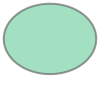

In [57]:
circle_poly